# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

%matplotlib notebook

sinasc = pd.read_csv('SINASC_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [66]:
quebras = [0, 3, 5, 7, 10.1]
rotulos = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

sinasc['APGAR5_CAT'] = pd.cut(sinasc['APGAR5'], bins=quebras, labels=rotulos, right=False)

sinasc[['APGAR5', 'APGAR5_CAT']].head()

,APGAR5,APGAR5_CAT
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<IPython.core.display.Javascript object>


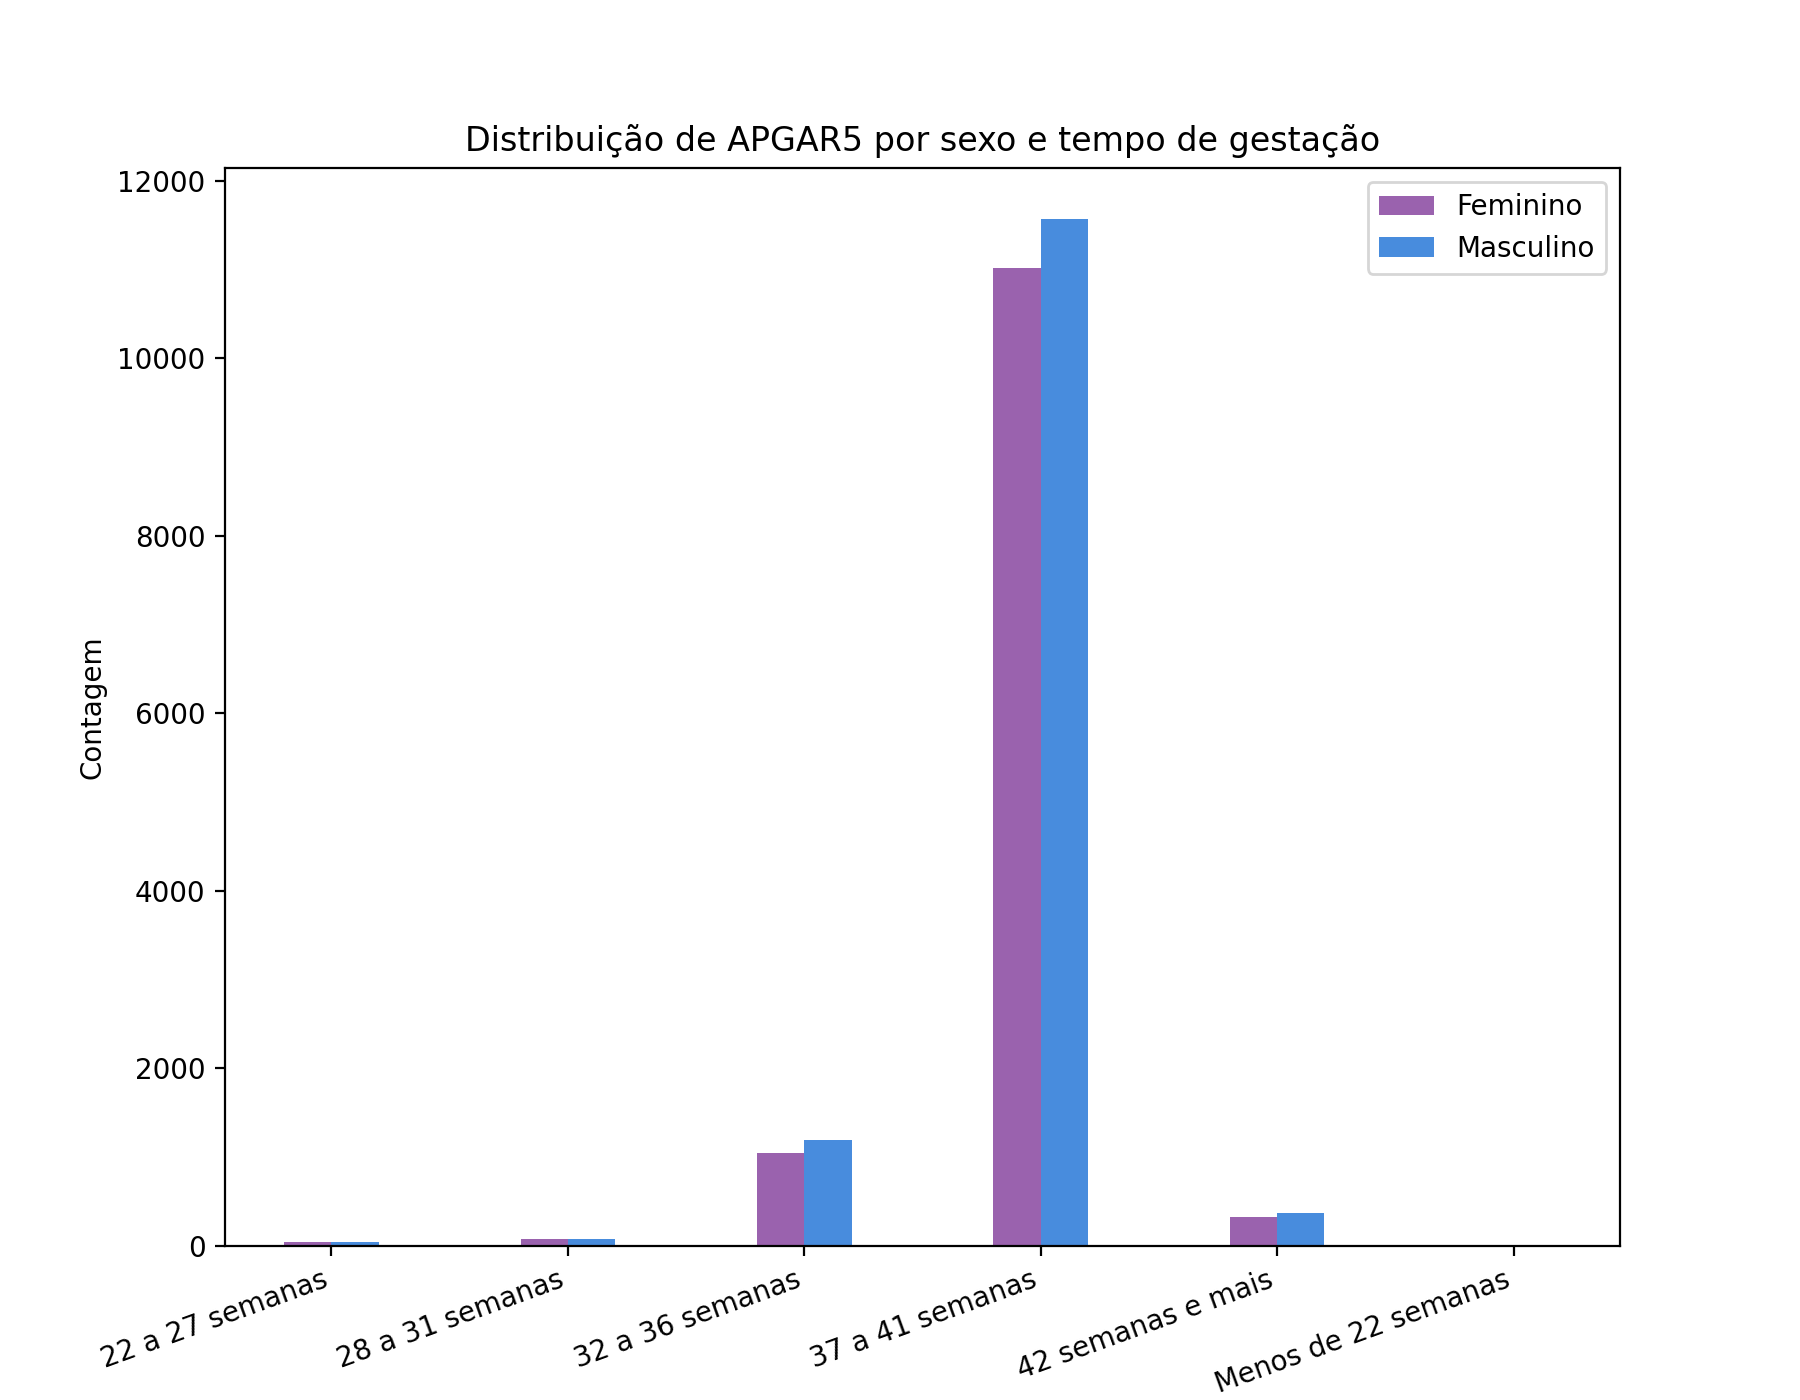

In [67]:
import matplotlib.pyplot as plt

data = sinasc[['GESTACAO', 'SEXO', 'APGAR5']]
grouped_data = data.groupby(['GESTACAO', 'SEXO']).size().unstack()

colors = ['#9A62AE', '#488CDD']

ax = grouped_data.plot(kind='bar', width=0.4, color=colors)

plt.title('Distribuição de APGAR5 por sexo e tempo de gestação')
plt.xlabel('Tempo de gestação')
plt.ylabel('Contagem')

plt.legend(['Feminino', 'Masculino'])
plt.rcParams['figure.figsize'] = (9, 7)
plt.xticks(rotation=20, ha='right')

plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [68]:
tabela_cruzada = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])

tabela_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [69]:
percentuais_linha = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'], normalize='index')

percentuais_linha

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<IPython.core.display.Javascript object>


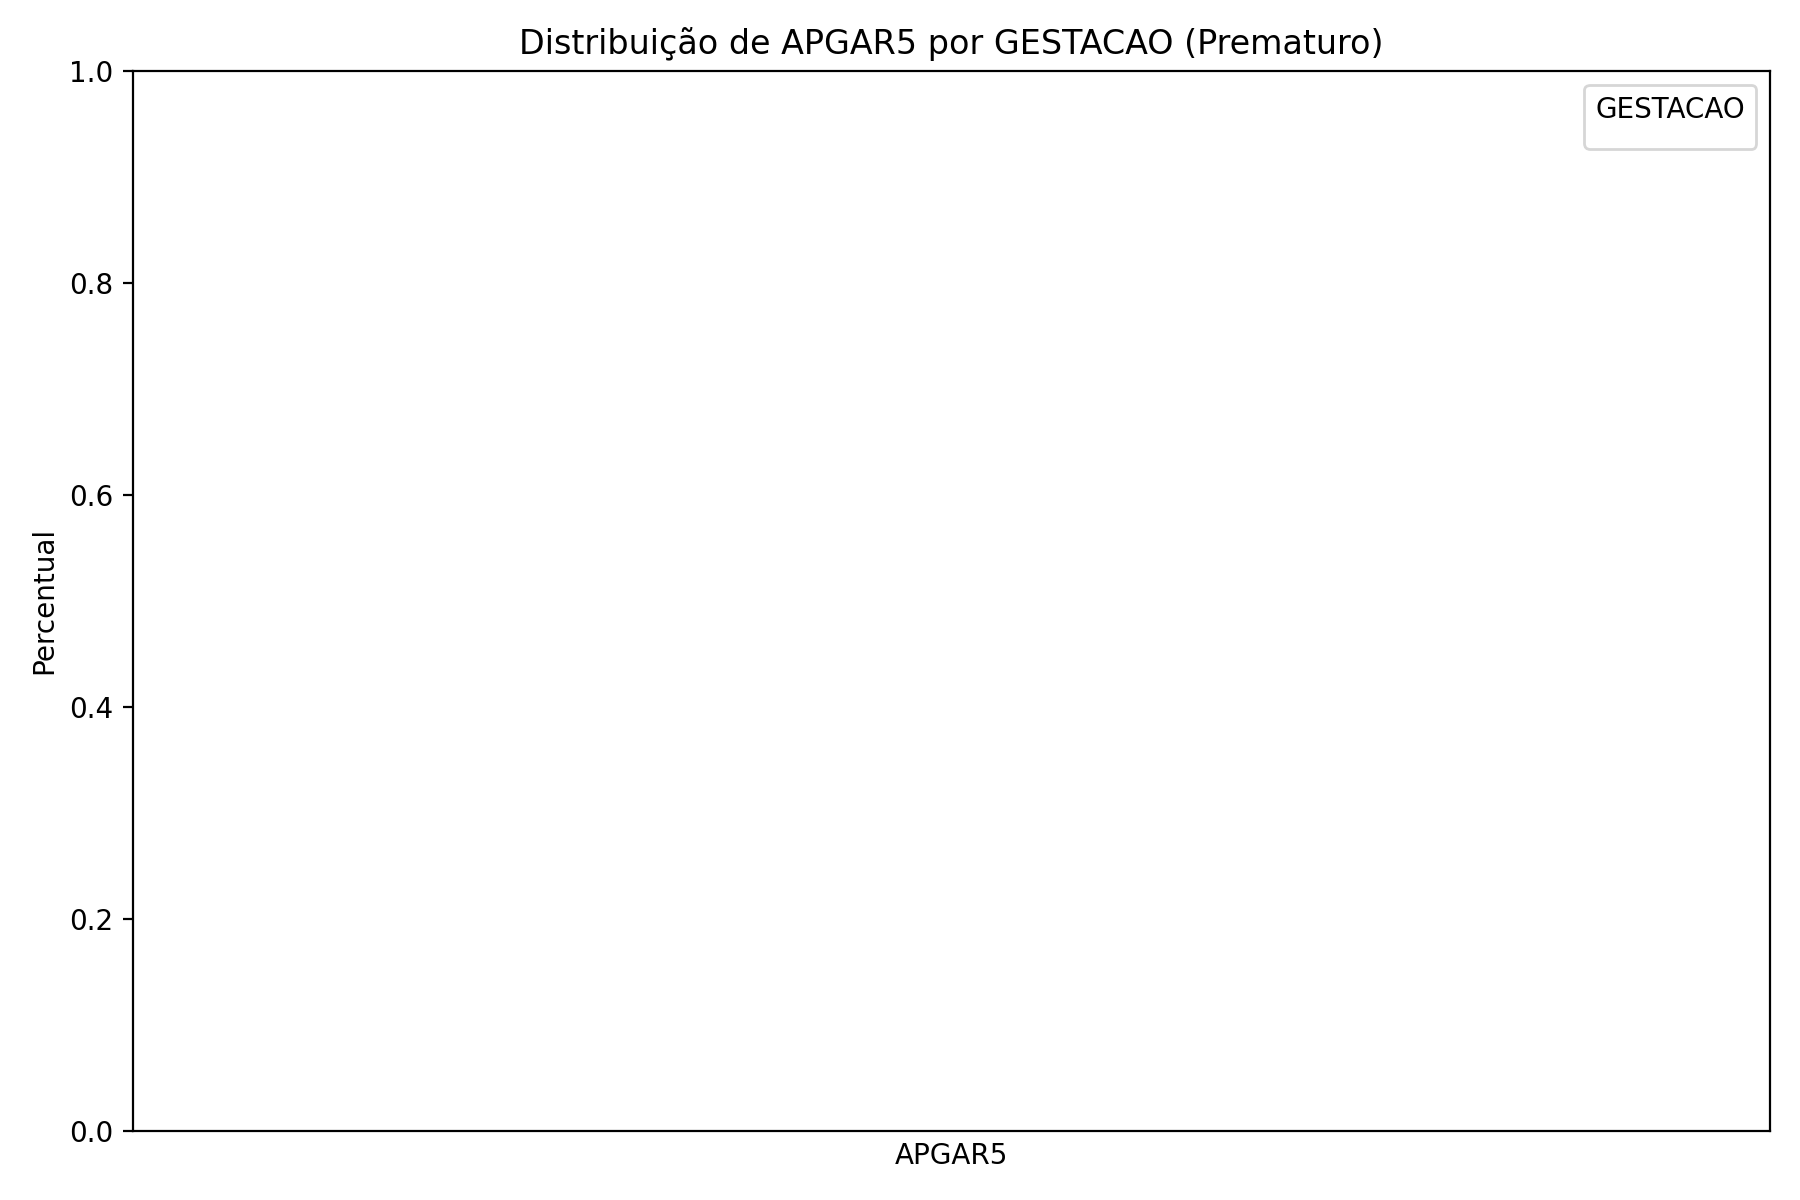

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [82]:
sinasc['GESTACAO'] = pd.to_numeric(sinasc['GESTACAO'], errors='coerce')

prematuro = sinasc[sinasc['GESTACAO'] < 37]

tabela_cruzada_prematuro = pd.crosstab(prematuro['GESTACAO'], prematuro['APGAR5'], normalize='index') * 100

grupos = tabela_cruzada_prematuro.index
rotulos = tabela_cruzada_prematuro.columns

fig, ax = plt.subplots()
largura_barras = 0.35

for i, grupo in enumerate(grupos):
    valores = tabela_cruzada_prematuro.loc[grupo].values
    posicoes = np.arange(len(valores))
    ax.bar(posicoes + i * largura_barras, valores, largura_barras, label=str(grupo))

ax.set_xlabel('APGAR5')
ax.set_ylabel('Percentual')
ax.set_title('Distribuição de APGAR5 por GESTACAO (Prematuro)')
ax.set_xticks(np.arange(len(rotulos)) + largura_barras / 2)
ax.set_xticklabels(rotulos)
ax.legend(title='GESTACAO')

plt.xticks(rotation=45, ha='right')

fig.set_size_inches(9, 6)
plt.tight_layout()

plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<IPython.core.display.Javascript object>


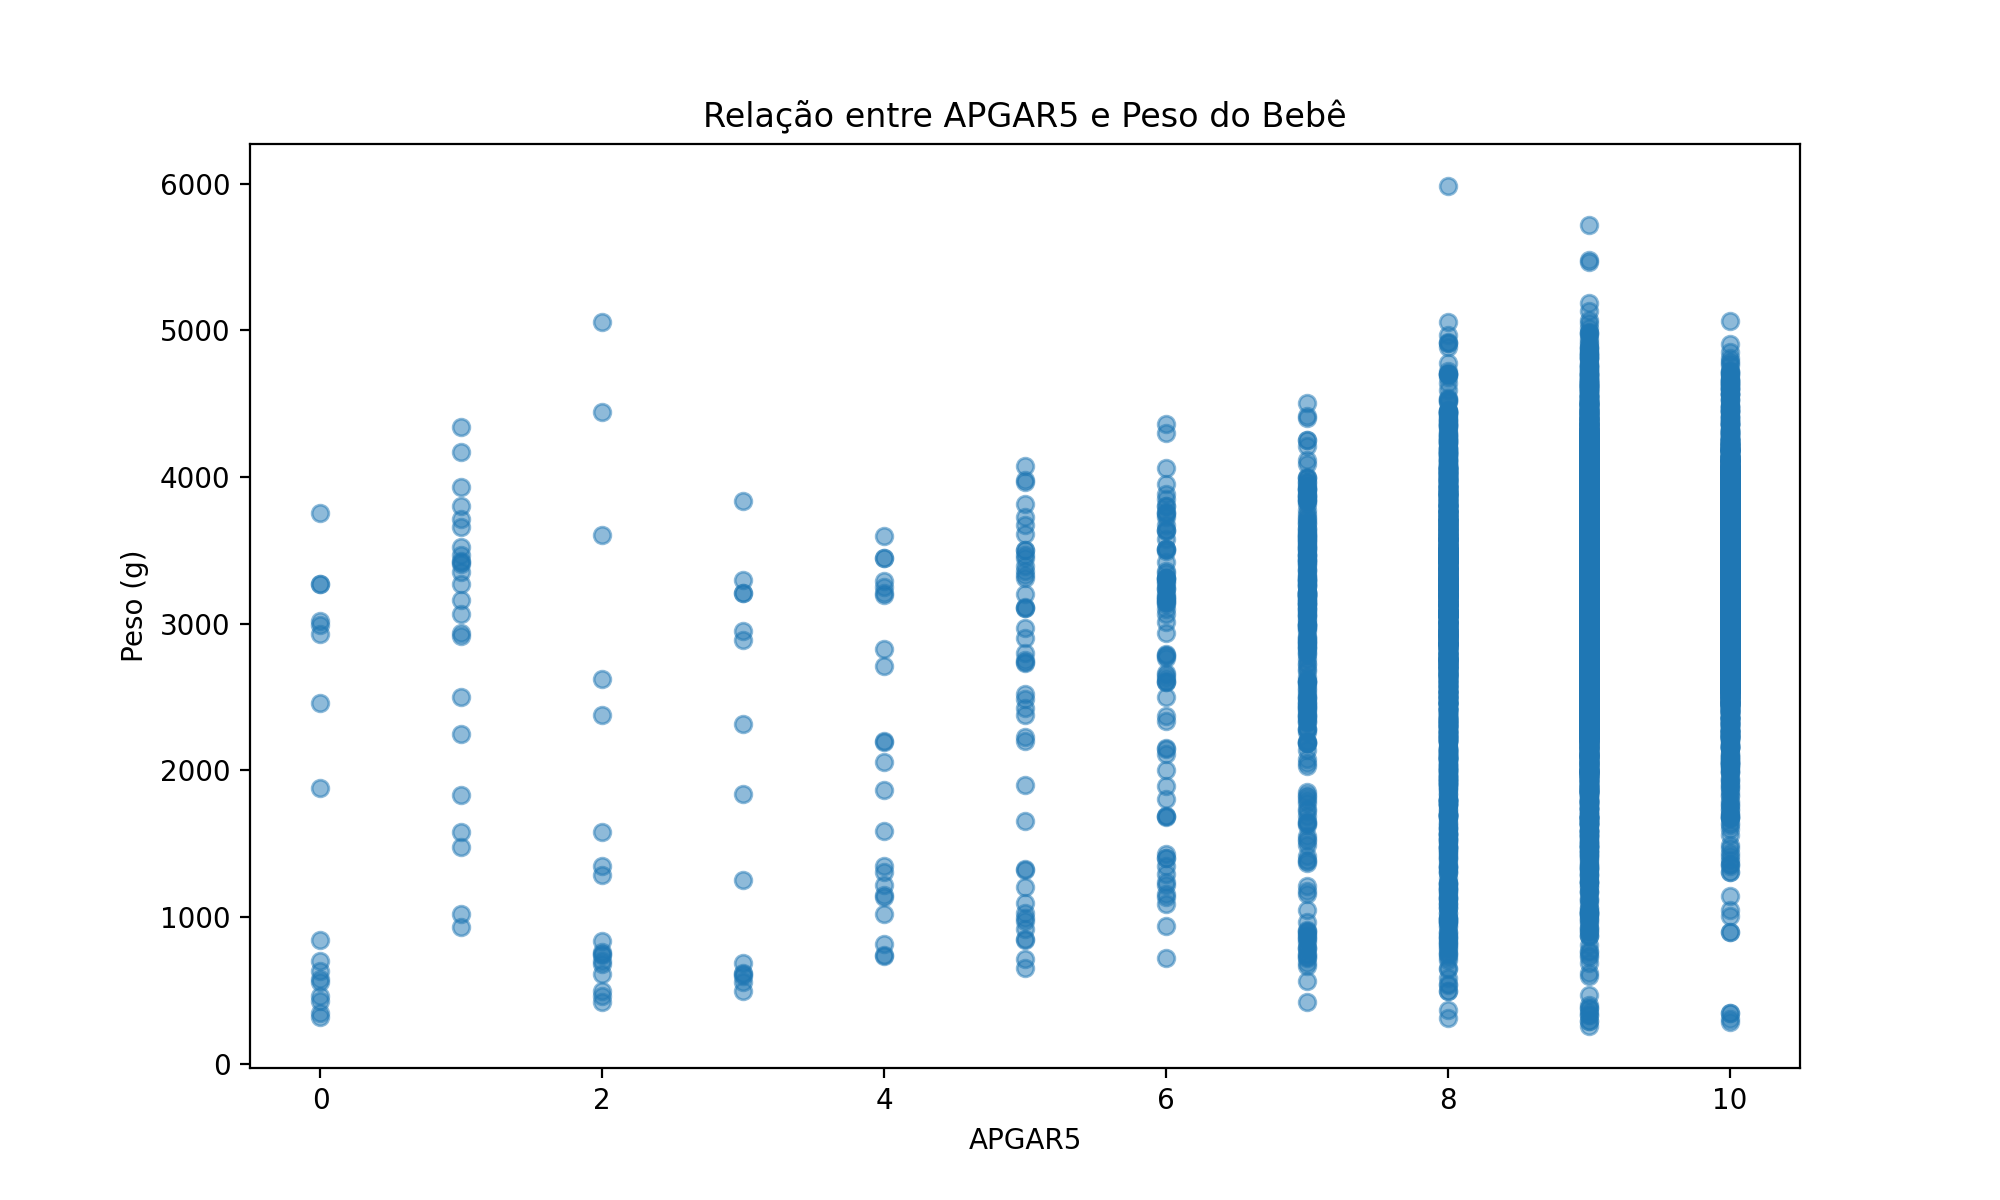

In [77]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(sinasc['APGAR5'], sinasc['PESO'], alpha=0.5)
ax.set_xlabel('APGAR5')
ax.set_ylabel('Peso (g)')

ax.set_title('Relação entre APGAR5 e Peso do Bebê')

plt.show()